In [1]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Data Knowledge

In [2]:
df = pd.read_excel('weight-height.xlsx')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df['Height'] = df['Height'].apply(lambda x: x*2.54)
df['Weight'] = df['Weight'].apply(lambda x: x*0.45359237)
df

,Gender,Height,Weight
0,Male,187.571423,109.721075
1,Male,174.706036,73.622792
2,Male,188.239668,96.497629
3,Male,182.196685,99.809586
4,Male,177.499761,93.598695
...,...,...,...
9995,Female,168.078536,62.041210
9996,Female,170.350573,77.504378
9997,Female,162.224700,58.275424
9998,Female,175.346978,74.322226


In [4]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

Tidak terdapat missing value pada data yang digunakan

In [5]:
print(f'Data yang digunakan memiliki {df.shape[0]} baris dan {df.shape[1]} kolom')

Data yang digunakan memiliki 10000 baris dan 3 kolom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


# Data Pre-processing

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,10000.0,168.573602,9.772721,137.828359,161.304276,168.447898,175.702625,200.656806
Weight,10000.0,73.228114,14.564143,29.347484,61.606032,73.124954,84.898668,122.465267


<AxesSubplot:>

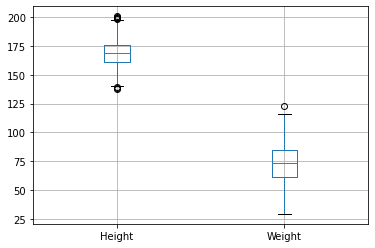

In [8]:
df.boxplot()

In [9]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Height    14.398349
Weight    23.292637
dtype: float64


In [10]:
df_cleared_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_cleared_iqr
df_cleared_iqr.shape

<ipython-input-10-0e00cc45a5d1>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_cleared_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-10-0e00cc45a5d1>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_cleared_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(9992, 3)

In [11]:
df = df_cleared_iqr

In [12]:
print(f'Setelah data dibersihkan dari outlier, data yang digunakan memiliki {df.shape[0]} baris dan {df.shape[1]} kolom')

Setelah data dibersihkan dari outlier, data yang digunakan memiliki 9992 baris dan 3 kolom


In [13]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

karena feature Gender merupakan data kategorikal, maka harus di encode terlebih dahulu

In [16]:
label_enc = LabelEncoder()

df.Gender = label_enc.fit_transform(df.Gender)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [17]:
df.tail()

,Gender,Height,Weight
9995,0,168.078536,62.041210
9996,0,170.350573,77.504378
9997,0,162.224700,58.275424
9998,0,175.346978,74.322226
9999,0,157.338385,51.550366


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,9992.0,0.499900,0.500025,0.000000,0.000000,0.000000,1.000000,1.000000
Height,9992.0,168.567115,9.738309,140.077336,161.313081,168.447282,175.690239,196.969853
Weight,9992.0,73.220132,14.523970,31.289949,61.607491,73.118029,84.878312,116.057653


# Data splitting

In [19]:
X = df.drop(columns='Weight')
y = df.Weight

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7993, 2), (1999, 2), (7993,), (1999,))

In [20]:
X_train

,Gender,Height
5854,0,171.568525
168,1,166.447968
8960,0,170.535319
7488,0,171.005049
9529,0,162.440602
...,...,...
5739,0,166.123685
5196,0,156.827360
5395,0,158.204190
860,1,175.449210


# Training

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

linreg = LinearRegression()

parameter = {"fit_intercept": [True, False]}

model = GridSearchCV(linreg, param_grid=parameter,cv=4, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)
#model = linreg.fit(X_train, y_train)

print(model.score(X_train, y_train), model.score(X_test, y_test))

Fitting 4 folds for each of 2 candidates, totalling 8 fits
0.9020830381291781 0.9029724486881712


In [22]:
predictions=model.predict(X_test)

In [23]:
print(predictions)

[92.23688311 91.58274219 87.27345816 ... 61.35029367 59.97943507
 80.42299974]


In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.6828432176054435
MSE: 21.099255810826698
RMSE: 4.593392625372525


# Save model

In [26]:
joblib.dump(model, filename="model_linearregression.pkl")

['model_linearregression.pkl']